In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime

In [2]:
df = pd.read_csv('international-airline-passengers.csv', parse_dates=['Month'],index_col='Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   passengers_in_thousands  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [3]:
# freq = 'H', 'D', 'W', 'MS': Hour, Day, Week, Month, Calendar month begin
df.index.freq='MS'
df.head()

,passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


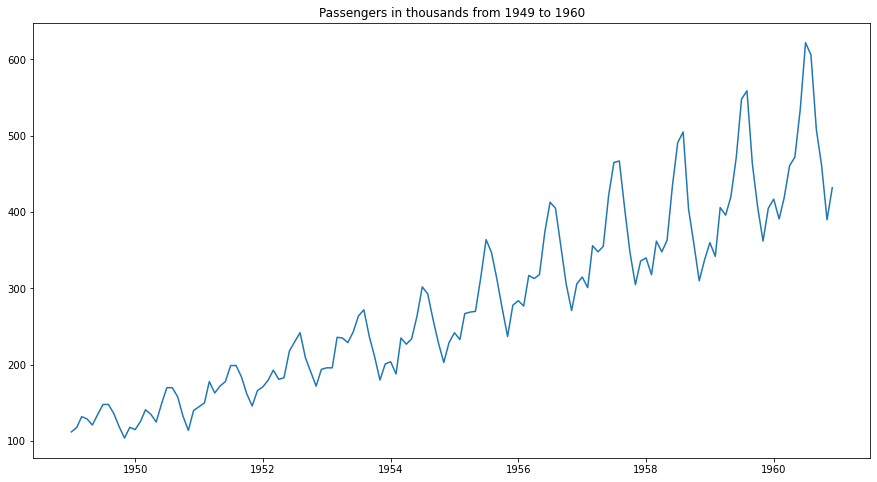

In [4]:
plt.figure(figsize=(15,8))
plt.plot(df)
plt.title("Passengers in thousands from 1949 to 1960")
plt.show()

In [5]:
result = seasonal_decompose(df, model='multiplicative')
result

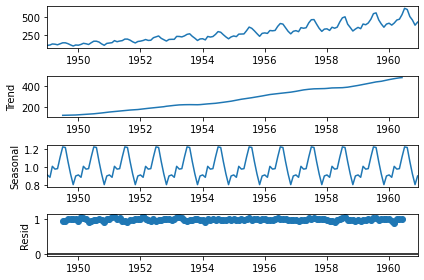

In [6]:
result.plot()
plt.show()

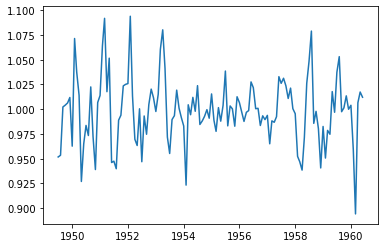

In [9]:
plt.plot(result.resid)

## Train / test split

In [11]:
train, test = df.iloc[:120, 0], df.iloc[120:,0]  # 10 years vs 2 years

In [12]:
train[0:5]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: passengers_in_thousands, dtype: int64

In [14]:
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()

pred = model.predict(start=test.index[0], end= test.index[-1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [40]:
mae = mean_absolute_error(test, pred[0:len(test)])
mse = mean_squared_error(test, pred[0:len(test)])
print(mae)
print(mse)

74.45821681841201
6773.938592464828


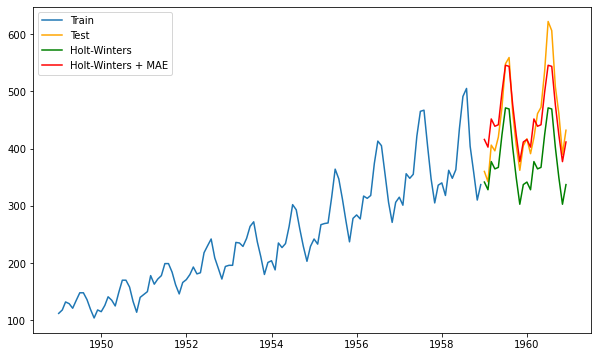

In [41]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, color='orange', label='Test')
plt.plot(pred.index, pred, color='green', label='Holt-Winters')
plt.plot(pred.index, pred + mae, color='red', label='Holt-Winters + MAE')
plt.legend(loc="best")
plt.show()

In [43]:
start_time = datetime.datetime(1961, 1, 1)
end_time = datetime.datetime(1961, 12, 1)
pred_next_12_month = model.predict(start= start_time, end= end_time)
pred_next_12_month

1961-01-01    341.427432
1961-02-01    328.015592
1961-03-01    377.229404
1961-04-01    364.463605
1961-05-01    367.091807
1961-06-01    424.066736
1961-07-01    471.020948
1961-08-01    469.127884
1961-09-01    401.991032
1961-10-01    349.390608
1961-11-01    302.676351
1961-12-01    337.000000
Freq: MS, dtype: float64

In [44]:
x = pd.Series(pred_next_12_month)
type(x)

pandas.core.series.Series

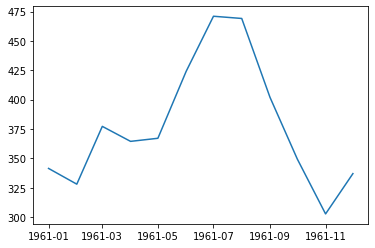

In [45]:
plt.plot(x.index, x.values)

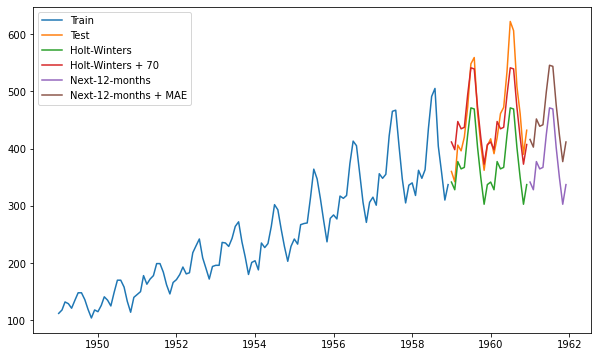

In [46]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred,  label='Holt-Winters')
plt.plot(pred.index, pred + 70,  label='Holt-Winters + 70')
plt.plot(x.index, x.values, label="Next-12-months")
plt.plot(x.index, x.values + mae, label="Next-12-months + MAE")
plt.legend(loc="best")
plt.show()